In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from util import *

In [2]:
# Generate train/test data
X_train, X_test, y_train, y_test = generate_training_data()

After removing rows and columns:  (97865, 35)


/Users/tanvirislam/opt/miniconda3/envs/project/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Index(['age', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'insulin', 'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'num_med_change', 'num_medications|time_in_hospital',
       'num_medications|num_procedures', 'time_in_hospital|num_lab_procedures',
       'num_medications|num_lab_procedures',
       'num_medications|number_diagnoses', 'age|number_diagnoses',
       'change|num_medications', 'number_diagnoses|time_in_hospital',
       'num_medications|num_med_change', 'gender_1', 'admission_type_id_3',
       'admission_type_id_4', 'admission_type_id_5',
       'discharge_disposition_id_2', 'discharge_disposition_id_7',
       'discharge_disposition_i

In [3]:
history = model_training_cnn(X_train, y_train, X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 8, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

2022-04-21 13:06:54.039258: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


None
Epoch 1/100
1324/1328 [============================>.] - ETA: 0s - loss: 0.8265 - accuracy: 0.5298
Epoch 1: val_loss improved from inf to 0.69062, saving model to models/model.hdf5
1328/1328 [==============================] - 10s 7ms/step - loss: 0.8261 - accuracy: 0.5297 - val_loss: 0.6906 - val_accuracy: 0.5310
Epoch 2/100
1327/1328 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5426
Epoch 2: val_loss improved from 0.69062 to 0.68482, saving model to models/model.hdf5
1328/1328 [==============================] - 9s 7ms/step - loss: 0.6908 - accuracy: 0.5426 - val_loss: 0.6848 - val_accuracy: 0.5485
Epoch 3/100
1321/1328 [============================>.] - ETA: 0s - loss: 0.6820 - accuracy: 0.5655
Epoch 3: val_loss improved from 0.68482 to 0.67017, saving model to models/model.hdf5
1328/1328 [==============================] - 9s 7ms/step - loss: 0.6817 - accuracy: 0.5659 - val_loss: 0.6702 - val_accuracy: 0.6194
Epoch 4/100
1322/1328 [=====================

Epoch 28/100
1320/1328 [============================>.] - ETA: 0s - loss: 0.2909 - accuracy: 0.8810
Epoch 28: val_loss improved from 0.28784 to 0.28764, saving model to models/model.hdf5
1328/1328 [==============================] - 9s 7ms/step - loss: 0.2912 - accuracy: 0.8809 - val_loss: 0.2876 - val_accuracy: 0.8832
Epoch 29/100
1322/1328 [============================>.] - ETA: 0s - loss: 0.2906 - accuracy: 0.8816
Epoch 29: val_loss did not improve from 0.28764
1328/1328 [==============================] - 9s 7ms/step - loss: 0.2905 - accuracy: 0.8816 - val_loss: 0.3010 - val_accuracy: 0.8752
Epoch 30/100
1322/1328 [============================>.] - ETA: 0s - loss: 0.2867 - accuracy: 0.8830
Epoch 30: val_loss improved from 0.28764 to 0.28269, saving model to models/model.hdf5
1328/1328 [==============================] - 9s 7ms/step - loss: 0.2869 - accuracy: 0.8828 - val_loss: 0.2827 - val_accuracy: 0.8893
Epoch 31/100
1321/1328 [============================>.] - ETA: 0s - loss: 0.284

1320/1328 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.8959
Epoch 56: val_loss improved from 0.26309 to 0.26240, saving model to models/model.hdf5
1328/1328 [==============================] - 8s 6ms/step - loss: 0.2632 - accuracy: 0.8959 - val_loss: 0.2624 - val_accuracy: 0.8998
Epoch 57/100
1326/1328 [============================>.] - ETA: 0s - loss: 0.2656 - accuracy: 0.8933
Epoch 57: val_loss did not improve from 0.26240
1328/1328 [==============================] - 9s 7ms/step - loss: 0.2656 - accuracy: 0.8933 - val_loss: 0.2711 - val_accuracy: 0.8974
Epoch 58/100
1321/1328 [============================>.] - ETA: 0s - loss: 0.2633 - accuracy: 0.8944
Epoch 58: val_loss did not improve from 0.26240
1328/1328 [==============================] - 8s 6ms/step - loss: 0.2634 - accuracy: 0.8944 - val_loss: 0.3078 - val_accuracy: 0.8788
Epoch 59/100
1328/1328 [==============================] - ETA: 0s - loss: 0.2663 - accuracy: 0.8936
Epoch 59: val_loss did not impr

Epoch 85/100
1321/1328 [============================>.] - ETA: 0s - loss: 0.2533 - accuracy: 0.8992
Epoch 85: val_loss did not improve from 0.25753
1328/1328 [==============================] - 9s 6ms/step - loss: 0.2529 - accuracy: 0.8994 - val_loss: 0.2617 - val_accuracy: 0.9039
Epoch 86/100
1327/1328 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.9001
Epoch 86: val_loss did not improve from 0.25753
1328/1328 [==============================] - 8s 6ms/step - loss: 0.2521 - accuracy: 0.9001 - val_loss: 0.2655 - val_accuracy: 0.9025
Epoch 87/100
1326/1328 [============================>.] - ETA: 0s - loss: 0.2492 - accuracy: 0.9021
Epoch 87: val_loss did not improve from 0.25753
1328/1328 [==============================] - 8s 6ms/step - loss: 0.2492 - accuracy: 0.9021 - val_loss: 0.2825 - val_accuracy: 0.8874
Epoch 88/100
1319/1328 [============================>.] - ETA: 0s - loss: 0.2513 - accuracy: 0.9006
Epoch 88: val_loss did not improve from 0.25753
1328/1328

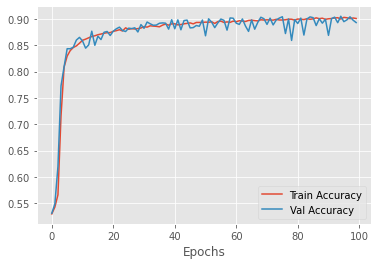

In [4]:
plot_history(history)